# Week 8 Seminar Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

## Question 1

In [2]:
data = yf.download('SPY', start='2023-03-14', end='2024-03-14')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-14,390.500000,393.450012,387.049988,391.730011,385.865387,149752400
2023-03-15,385.890015,389.489990,383.709991,389.279999,383.452057,172996900
2023-03-16,386.820007,396.470001,386.290009,396.109985,390.179749,143254200
2023-03-17,393.220001,394.399994,388.549988,389.989990,385.617523,140553400
2023-03-20,390.799988,394.170013,390.070007,393.739990,389.325470,93055800


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-07,513.140015,515.890015,509.809998,514.809998,514.809998,58652100
2024-03-08,515.460022,518.219971,511.130005,511.720001,511.720001,86425500
2024-03-11,510.480011,511.880005,508.500000,511.279999,511.279999,62557200
2024-03-12,513.450012,517.380005,510.859985,516.780029,516.780029,73114400
2024-03-13,517.109985,517.289978,514.489990,515.969971,515.969971,55104100


In [5]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 515.97


## Question 2 

Step 1: Find the log return of Index

In [6]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

Step 2: Calculate its standard deviation and annualised  it 

In [7]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 11.89 %


And the spot value for VIX is 

In [8]:
VIX = yf.download("^VIX", start="2023-03-14", end="2024-03-14")

[*********************100%%**********************]  1 of 1 completed


In [9]:
vix = VIX['Adj Close'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 13.75 %


## Question 3

In [10]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [11]:
K = 400
T = 1/52    
r = 0.0382

In [12]:
call = euro_option_bs(S, K, T, r, vol, 'call')
print('The BS call price is', round(call, 2))

The BS call price is 116.26


In [13]:
put = euro_option_bs(S, K, T, r, vol, 'put')
print('The BS put price is', round(put, 2))

The BS put price is 0.0


## Question 4

In [14]:
SP500 = yf.Ticker('SPY')

In [19]:
opt = SP500.option_chain('2024-03-22')
call1 = opt.calls.lastPrice[opt.calls.strike == K]
print('The Market call price is', float(call1.values))

The Market call price is 110.44


In [20]:
put1 = opt.puts.lastPrice[opt.puts.strike == K]
print('The Market put price is', float(put1.values))

The Market put price is 0.02


## Question 5

In [21]:
call2 = euro_option_bs(S, K, T, r, vix*0.01, 'call')
print('The BS call price is', round(call2,2))

The BS call price is 116.26


In [22]:
put2 = euro_option_bs(S, K, T, r, vix*0.01, 'put')
print('The BS put price is', round(put2,2))

The BS put price is 0.0


The results using the VIX is almost identical to the results using the historical standard deviation. This is because the VIX value and the historical standard deviation are very close.

## Question 6

In [23]:
K = np.linspace(375,425,6)
T = [1/52, 2/52, 1/12, 2/12, 1/4, 1/2, 1]

In [24]:
call = np.zeros((len(T),len(K)))
for i in range(len(T)):
    for j in range(len(K)):
        call[i,j] = euro_option_bs(S, K[j], T[i], r, vix*0.01, 'call')

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

strike, ttm = np.meshgrid(K, T)

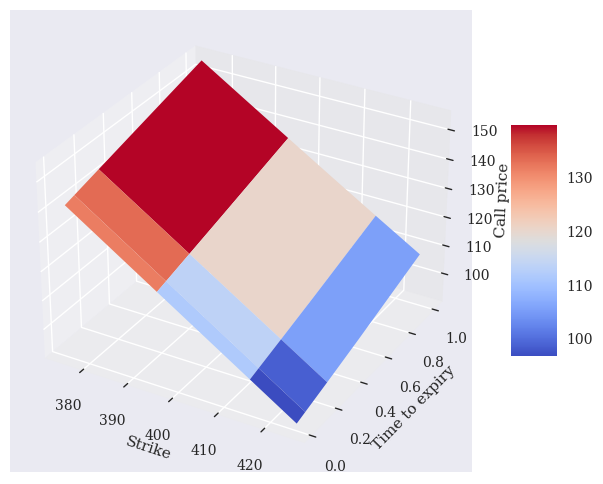

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(strike, ttm, call, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike')
ax.set_ylabel('Time to expiry')
ax.set_zlabel('Call price')
fig.colorbar(surf, shrink=0.5, aspect=5);